Below you'll find final visualizations for this project that were included in the presentation. The goal of this notebook was to make the visualizations more consistent and make sure they are providing appropriate information to the viewer. Analysis of these visualizations can be found in the 03.KMedoids_Analysis notebook.

Finally, at the end I create playlists for the top 50 songs in each cluster based on their similarity value.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [191]:
clusters = pd.read_csv('data/clusters.csv').drop('Unnamed: 0', axis=1)
print(clusters.shape)
clusters.head()

(36451, 26)


,artists,name,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,release_date,year,medoid_0,medoid_1,medoid_2,medoid_3,cluster,genre,track_id,artist_id
0,['Three Dog Night'],It Ain't Easy,0.465,0.629,166707,0.376,0,0.000000,7,0.2350,-13.934,1,26,0.0337,76.848,0.347,1970-01-01,1970,0.218438,0.254809,0.278542,0.113587,3,"['album rock', 'art rock', 'blues rock', 'bril...",2hKxnhi2Eb3443AQbOnqNl,4FAEZeJcsYYBkNq2D3KGTV
1,['Martha Reeves & The Vandellas'],I Should Be Proud,0.166,0.417,176573,0.753,0,0.000000,9,0.2690,-10.204,0,33,0.1260,178.408,0.794,1970,1970,0.237460,0.175485,0.325105,0.310158,1,"['brill building pop', 'classic girl group', '...",2nxSAQBvF6gDIwZmG6B9nO,1Pe5hlKMCTULjosqZ6KanP
2,['Roberto Luti'],Celoso,0.840,0.526,158387,0.501,0,0.000000,0,0.1390,-8.088,1,39,0.0367,113.546,0.762,1970-08-28,1970,0.105862,0.246640,0.282148,0.086823,3,['pop romantico'],5FD1IZKwXVSL3zGwlNvLoF,33Cme6gMFRML19GrfipNMH
3,['Dionne Warwick'],Raindrops Keep Falling on My Head,0.908,0.691,179040,0.157,0,0.000007,1,0.0898,-13.711,1,36,0.0475,89.844,0.378,1970,1970,0.254998,0.290001,0.232987,0.151798,3,"['adult standards', 'brill building pop', 'dis...",5o5fCEeIGC8igGmbXQZL8Q,2JSjCHK79gdaiPWdKiNUNp
4,['Johnny Mathis'],Raindrops Keep Fallin' On My Head,0.908,0.609,149627,0.380,0,0.001520,5,0.0728,-10.527,1,31,0.0343,109.514,0.612,1970-02-25,1970,0.201921,0.248245,0.288763,0.138733,3,"['adult standards', 'brill building pop', 'eas...",6BZaceyM6nWzq0AUFcaEX1,21LGsW7bziR4Ledx7WZ1Wf


In [192]:
# remove quotes from genre columns
import ast
clusters.genre = clusters.genre.apply(ast.literal_eval)

In [177]:
# set color for visuals
color = [0.57916573903086, 0.33934576125314425, 0.5219003947563425]

# General EDA #

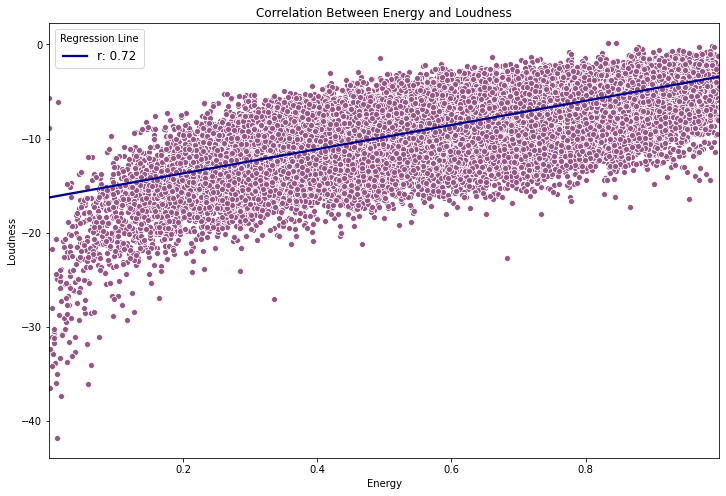

In [178]:
# correlation between energy and loudness
plt.figure(figsize=(12,8))
sns.regplot(clusters.energy, clusters.loudness, color='darkblue', scatter=False, label='r: 0.72')
sns.scatterplot(clusters.energy, clusters.loudness, color=color)
plt.title('Correlation Between Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend(loc='upper left', fontsize='large', title='Regression Line')
plt.show()

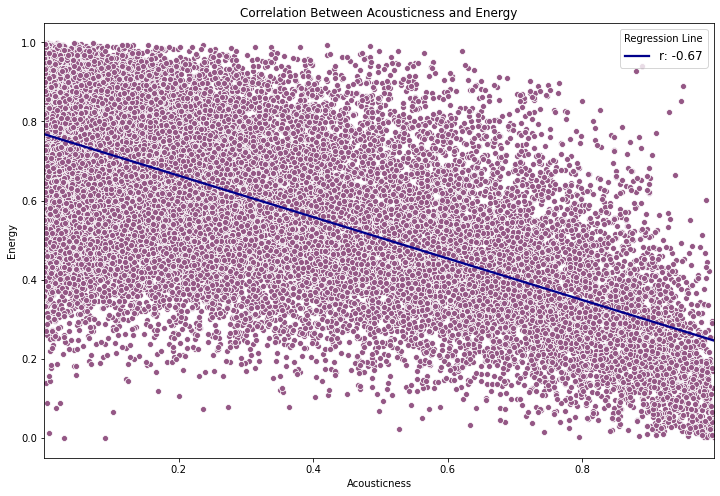

In [179]:
# correlation between accousticness and energy
plt.figure(figsize=(12,8))
sns.regplot(clusters.acousticness, clusters.energy, color='darkblue', scatter=False, label='r: -0.67')
sns.scatterplot(clusters.acousticness, clusters.energy, color=color)
plt.title('Correlation Between Acousticness and Energy')
plt.ylabel('Energy')
plt.xlabel('Acousticness')
plt.legend(loc='upper right', fontsize='large', title='Regression Line')
plt.show()

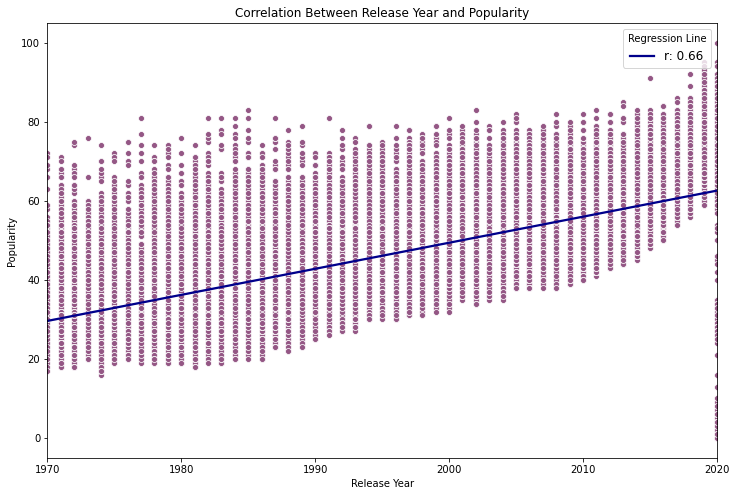

In [180]:
# correlation between release year and popularity
plt.figure(figsize=(12,8))
sns.regplot(clusters.year, clusters.popularity, color='darkblue', scatter=False, label='r: 0.66')
sns.scatterplot(clusters.year, clusters.popularity, color=color)
plt.title('Correlation Between Release Year and Popularity')
plt.ylabel('Popularity')
plt.xlabel('Release Year')
plt.legend(loc='upper right', fontsize='large', title='Regression Line')
plt.show()

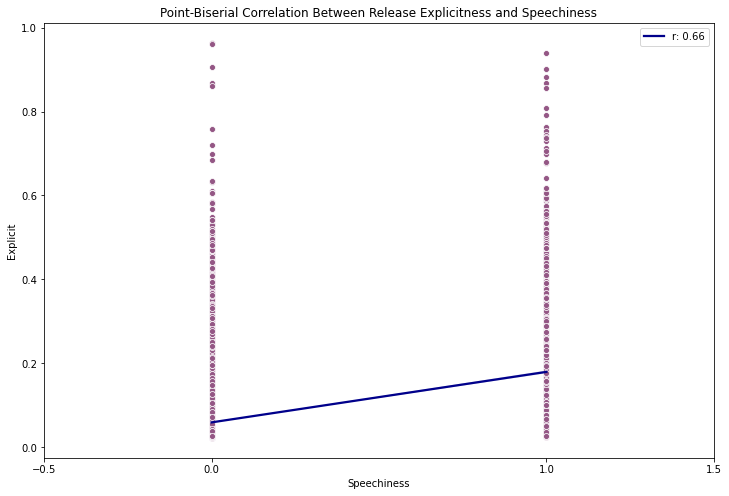

In [181]:
# point-biserial correlation between explicitness and speechiness
plt.figure(figsize=(12,8))
sns.regplot(clusters.explicit, clusters.speechiness, color='darkblue', scatter=False, label='r: 0.66')
sns.scatterplot(clusters.explicit, clusters.speechiness, color=color)
plt.title('Point-Biserial Correlation Between Release Explicitness and Speechiness')
plt.ylabel('Explicit')
plt.xlabel('Speechiness')
plt.xticks([-0.5, 0, 1, 1.5])
plt.show()

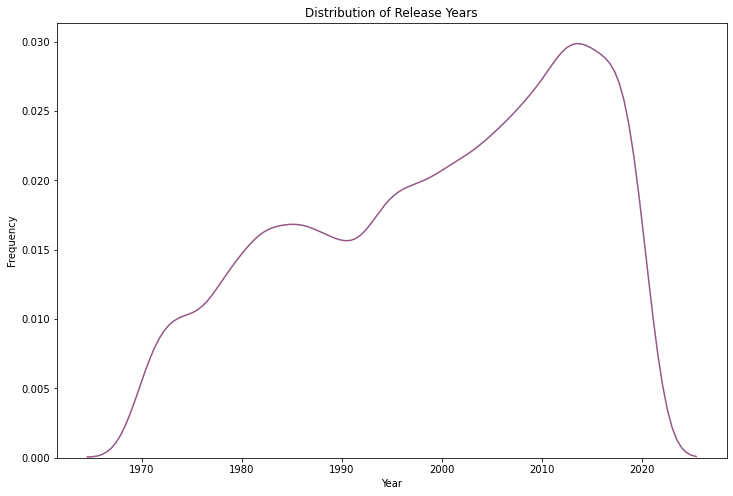

In [182]:
# distribution of release years
plt.figure(figsize=(12, 8))
sns.distplot(clusters.year, hist=False, color=color)
plt.title('Distribution of Release Years')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

# Cluster EDA #

In [183]:
# set palette for cluster division
sns.set_palette([[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
                 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
                 [0.37894937987025, 0.2224702044652721, 0.41140014301575434],
                 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]])

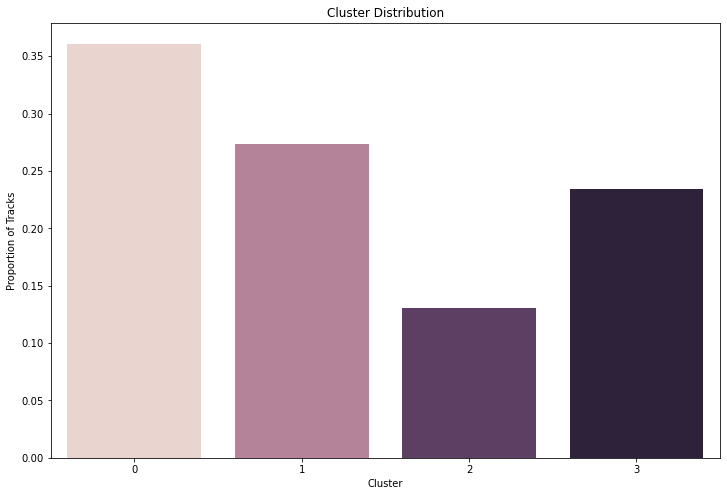

In [184]:
# proportion of tracks in clusters
plt.figure(figsize=(12, 8))
sns.barplot(clusters.cluster.value_counts(normalize=True).index, clusters.cluster.value_counts(normalize=True).values)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Tracks')
plt.show()

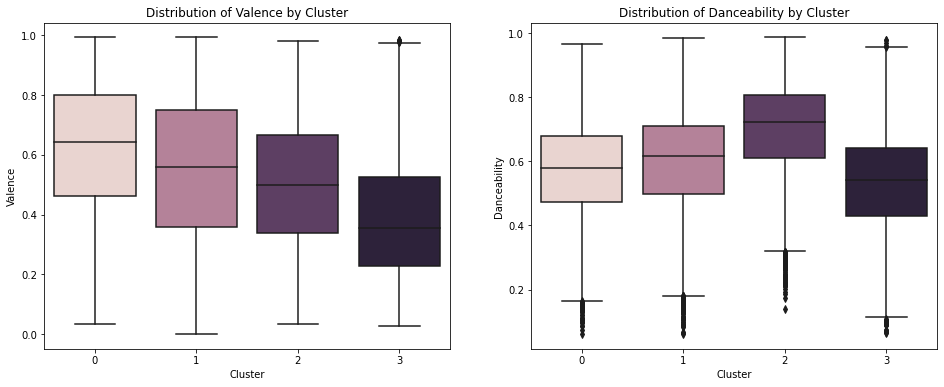

In [185]:
# valence and danceability by cluster
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.boxplot(clusters.cluster, clusters.valence, ax=axs[0])
axs[0].set_title('Distribution of Valence by Cluster')
axs[0].set_ylabel('Valence')
axs[0].set_xlabel('Cluster')
sns.boxplot(clusters.cluster, clusters.danceability, ax=axs[1])
axs[1].set_title('Distribution of Danceability by Cluster')
axs[1].set_ylabel('Danceability')
axs[1].set_xlabel('Cluster')
plt.show()

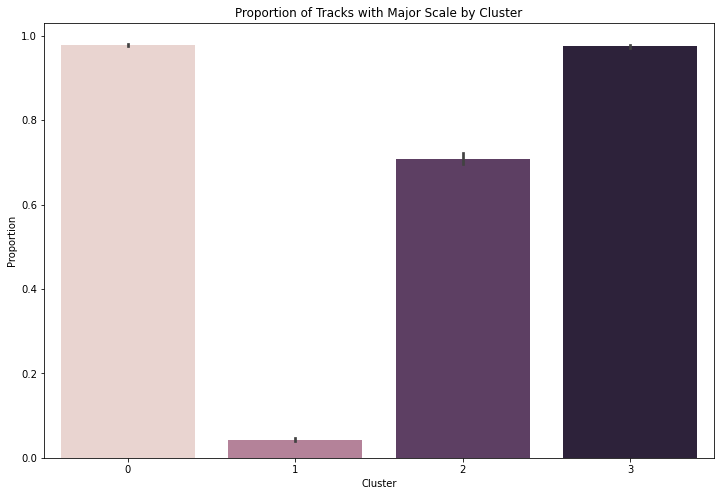

In [186]:
# proportion of tracks with Major Scale
plt.figure(figsize=(12,8))
sns.barplot(clusters.cluster, clusters['mode'])
plt.title('Proportion of Tracks with Major Scale by Cluster')
plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.show()

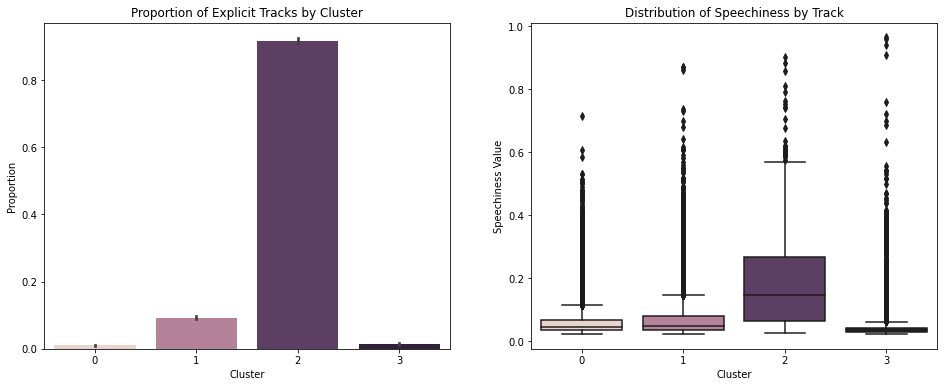

In [197]:
# explicitness and speechiness distributions
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(clusters.cluster, clusters.explicit, ax=axs[0])
axs[0].set_title('Proportion of Explicit Tracks by Cluster')
axs[0].set_ylabel('Proportion')
axs[0].set_xlabel('Cluster')
sns.boxplot(clusters.cluster, clusters.speechiness, ax=axs[1])
axs[1].set_title('Distribution of Speechiness by Track')
axs[1].set_ylabel('Speechiness Value')
axs[1].set_xlabel('Cluster')
plt.show()

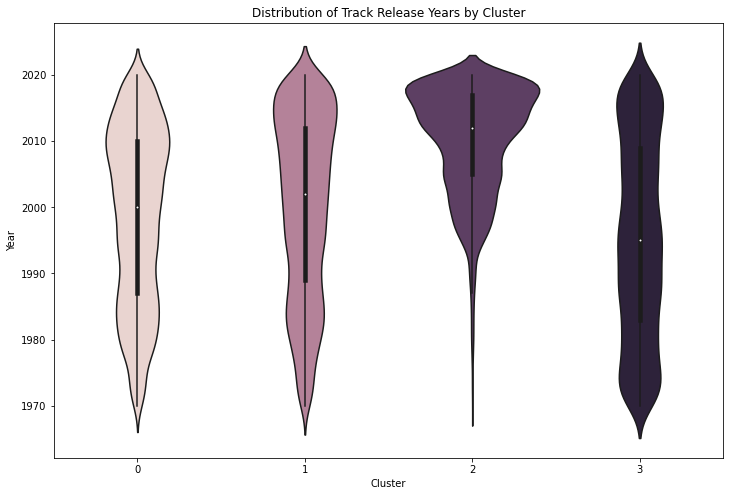

In [198]:
# track years by cluster
plt.figure(figsize=(12,8))
plt.title('Distribution of Track Release Years by Cluster')
sns.violinplot(clusters.cluster, clusters.year)
plt.ylabel('Year')
plt.xlabel('Cluster')
plt.show()

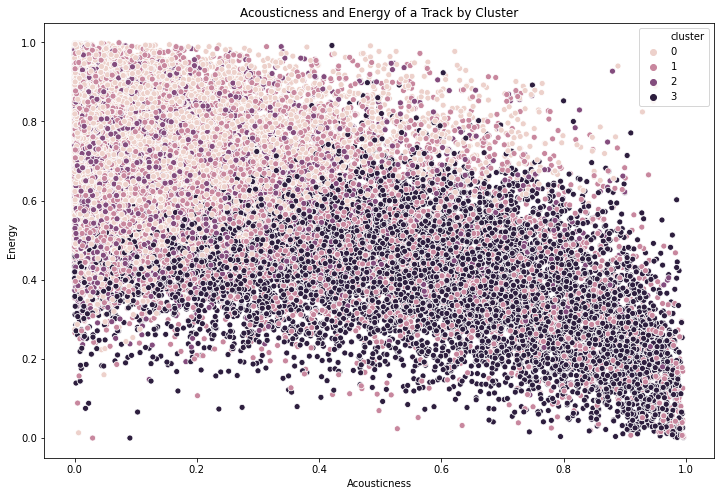

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(clusters.acousticness, clusters.energy, hue=clusters.cluster)
plt.title('Acousticness and Energy of a Track by Cluster')
plt.ylabel('Energy')
plt.xlabel('Acousticness')
plt.show()

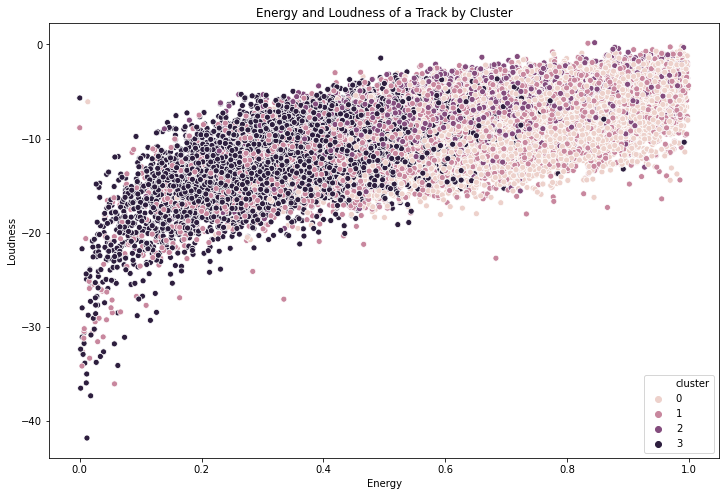

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(clusters.energy, clusters.loudness, hue=clusters.cluster)
plt.title('Energy and Loudness of a Track by Cluster')
plt.ylabel('Loudness')
plt.xlabel('Energy')
plt.show()

# Genre EDA #

### Distribution of Genres by Cluster ###

In [53]:
from wordcloud import WordCloud

In [129]:
c0 = dict(zip(clusters[clusters.cluster == 0].explode('genre').genre.value_counts().index,
              clusters[clusters.cluster == 0].explode('genre').genre.value_counts().values))

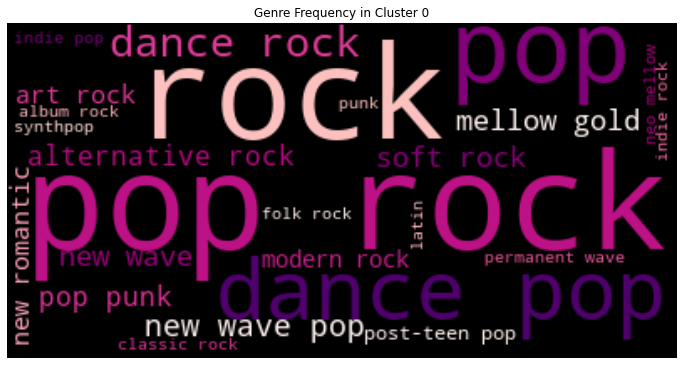

In [167]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black', max_words=25, colormap='RdPu_r').generate_from_frequencies(c0)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Genre Frequency in Cluster 0')
plt.axis("off")
plt.show()

In [151]:
c1 = dict(zip(clusters[clusters.cluster == 1].explode('genre').genre.value_counts().index,
              clusters[clusters.cluster == 1].explode('genre').genre.value_counts().values))

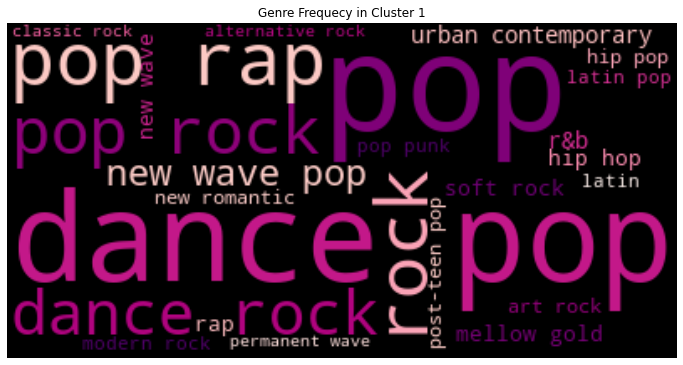

In [168]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black', max_words=25, colormap='RdPu_r').generate_from_frequencies(c1)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Genre Frequecy in Cluster 1')
plt.axis("off")
plt.show()

In [161]:
c2 = dict(zip(clusters[clusters.cluster == 2].explode('genre').genre.value_counts().index,
              clusters[clusters.cluster == 2].explode('genre').genre.value_counts().values))

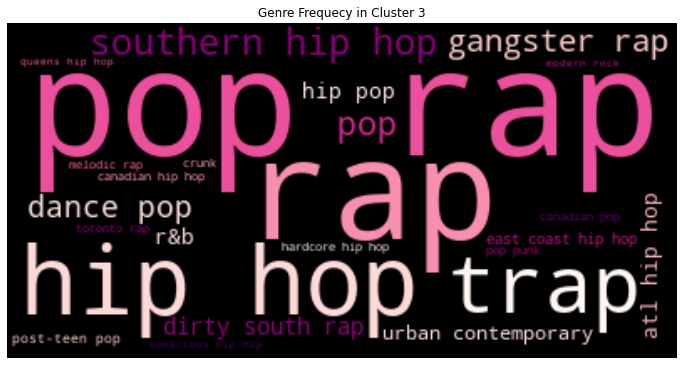

In [173]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black', max_words=25, colormap='RdPu_r').generate_from_frequencies(c2)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Genre Frequecy in Cluster 3')
plt.axis("off")
plt.show()

In [171]:
c3 = dict(zip(clusters[clusters.cluster == 3].explode('genre').genre.value_counts().index,
              clusters[clusters.cluster == 3].explode('genre').genre.value_counts().values))

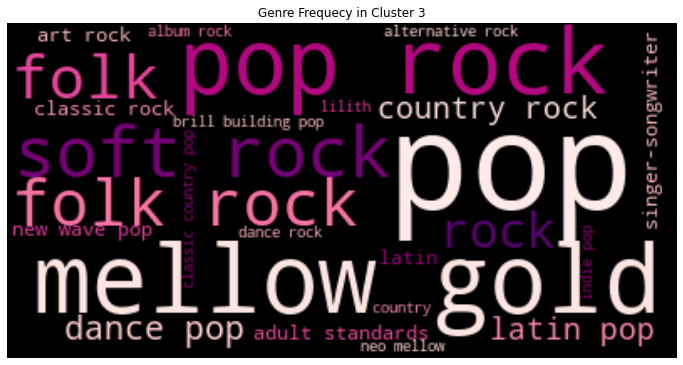

In [201]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black', max_words=25, colormap='RdPu_r').generate_from_frequencies(c3)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Genre Frequecy in Cluster 3')
plt.axis("off")
plt.show()

# Playlist Creation #

In [222]:
import spotipy
from spotipy import util
from spotipy.oauth2 import SpotifyClientCredentials

In [230]:
# accessing Spotify API
token = util.prompt_for_user_token(username, scope='playlist-modify-private,playlist-modify-public', 
                                   client_id=client_id, client_secret=client_secret, 
                                   redirect_uri='http://example.com')
sp = spotipy.Spotify(auth=token)

### Playlist for Cluster 0 ###

In [242]:
# create new playlist
sp.user_playlist_create(username, name='Capstone Playlist: Cluster 0');

In [243]:
# get top 50 tracks from Cluster 0 based on the similarity value
top50 = list(clusters[clusters.cluster==0].sort_values('medoid_0').track_id[:52])

# add songs to the playlist
sp.user_playlist_add_tracks(username, '629Jrefu0rNKh4mOhnYWWN', top50)

{'snapshot_id': 'MyxmZDc1YWI2MWQxNzY0ZTcyNGFiMTQ4NDkxYWRmZTA4NDEzMzQ5NzM3'}

### Playlist for Cluster 1 ###

In [245]:
# create new playlist
sp.user_playlist_create(username, name='Capstone Playlist: Cluster 1')['id']

'6JENzX44x8FHQV43g5WpEy'

In [246]:
# get top 50 tracks from Cluster 0 based on the similarity value
top50 = list(clusters[clusters.cluster==1].sort_values('medoid_1').track_id[:52])

# add songs to the playlist
sp.user_playlist_add_tracks(username, '6JENzX44x8FHQV43g5WpEy', top50)

{'snapshot_id': 'MywxN2Y0YzlmYWNiNTBkNzlmYmM5MTRkYjMzZmNhMDMyMTkxMWJjMGE1'}

### Playlist for Cluster 2 ###

In [247]:
# create new playlist
sp.user_playlist_create(username, name='Capstone Playlist: Cluster 2')['id']

'3dj735Sxd8EHFF3nFwwGgR'

In [248]:
# get top 50 tracks from Cluster 0 based on the similarity value
top50 = list(clusters[clusters.cluster==2].sort_values('medoid_2').track_id[:52])

# add songs to the playlist
sp.user_playlist_add_tracks(username, '3dj735Sxd8EHFF3nFwwGgR', top50)

{'snapshot_id': 'Myw0YzUzMWFhMGJjZjQzNDZhYzI2MmNiYzMzMWZmYzNhOTNiMTJhODQ3'}

### Playlist for Cluster 3 ###

In [249]:
# create new playlist
sp.user_playlist_create(username, name='Capstone Playlist: Cluster 3')['id']

'6ELhFjfvOzsAHVviqEbGBd'

In [250]:
# get top 50 tracks from Cluster 0 based on the similarity value
top50 = list(clusters[clusters.cluster==3].sort_values('medoid_3').track_id[:52])

# add songs to the playlist
sp.user_playlist_add_tracks(username, '6ELhFjfvOzsAHVviqEbGBd', top50)

{'snapshot_id': 'MyxjNDlkMTQ1ZWU0NTI0NDY5ODMyZmZiYTlkMDQwZjZkNjYyZmM0ODRj'}